<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия-на-исходных-данных" data-toc-modified-id="Линейная-регрессия-на-исходных-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия на исходных данных</a></span></li><li><span><a href="#Линейная-регрессия-на-преобразованных-данных" data-toc-modified-id="Линейная-регрессия-на-преобразованных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Линейная регрессия на преобразованных данных</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<div style="border:solid silver 2px; padding: 30px">

<h2>Защита персональных данных клиентов <a class="tocSkip"> </h2> 
    
Защита персональных данных клиентовВам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.
    
<strong>Цель исследования:</strong> Создание метода преобразования данных, чтобы по ним было сложно восстановить персональную информацию

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np

# методы и метрики
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# модель
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


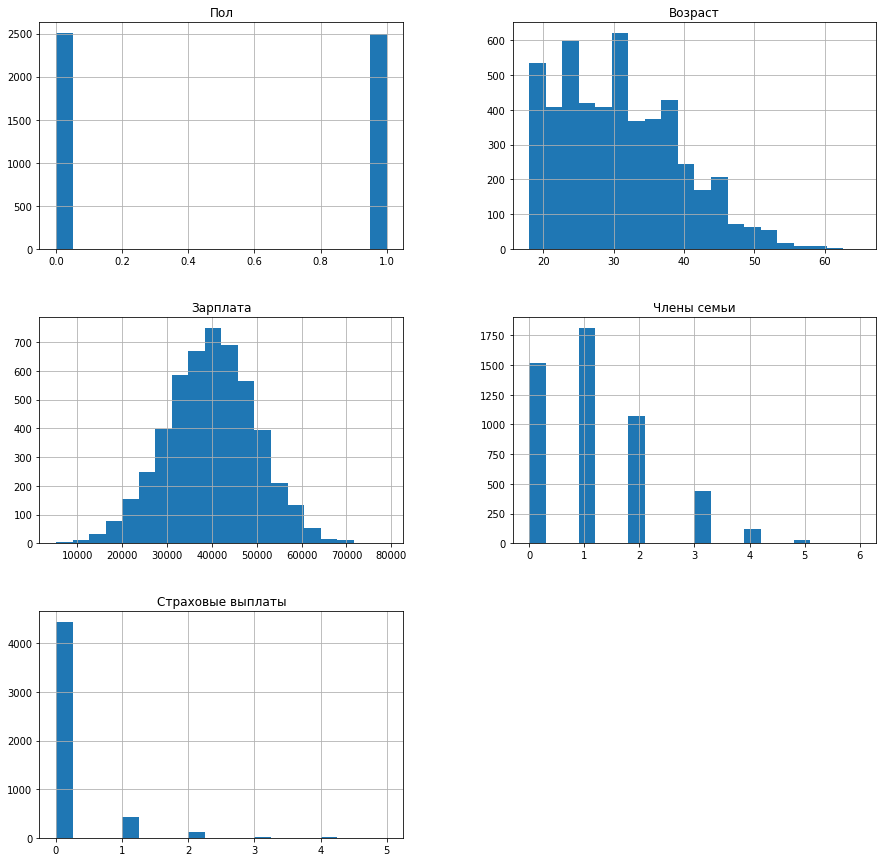

In [3]:
display(data.head(10))
display(data.info())
display(data.describe())
data.hist(bins=20, figsize=(15, 15));

<div style="border:solid silver 2px; padding: 30px">

<h2>Вывод: <a class="tocSkip"> </h2> 
    
* Всего в датасете 5 колонок и 5000 наблюдений
* Данные выглядят качественно, пропусков и выбросов не наблюдается, названия столбцов обозначены в едином стиле. Единственное, что нужно исправить - это тип данных с дробного на целочисленный
* Пол обозначен как 0 - женский и 1 - мужской, данные распределены равномерно
* Минимальный возраст клиента – 18 лет, максимальный – 65. Средний возраст - 31 год
* Средняя зарплата ~ 40 тысяч
* Минимальное количество членов семьи 0 означает, что застрахованный проживает один, максимальное – 6
* В целевом признаке, который содержит количество страховых выплат клиенту за последние 5 лет, минимальное значение 0 выплат, максимальное – 5 выплат, что скорее всего означает 1 выплату в год. Большинство клиентов еще не получило ни одной выплаты

In [4]:
# преобразуем тип данных
data = data.astype('int')
data.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

In [5]:
# проверим наличие дубликатов
data.duplicated().sum()

153

In [6]:
data[data.duplicated(keep=False)].sort_values(by='Возраст').head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1566,1,18,39800,2,0
2429,1,18,39800,2,0
2694,1,19,52600,0,0
712,1,19,52600,0,0
851,0,19,51700,0,0


📌 Такие совпадения вполне вероятны, поэтому считать их дублями не будем и оставим как есть

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки $X$ умножают на обратимую матрицу $P$. Изменится ли качество линейной регрессии? (Её можно обучить заново)

**Ответ:** Если матрица, на которую умножаются признаки, является обратимой, то качество линейной регрессии не изменится

**Обоснование:** Чтобы преобразования данные матрицы признаков $X$ мы должны умножить ее на матрицу $P$, результат сохраним в матрице с обозначением $C$ (от слова "cipher"):
$$
C = XP
$$

Тогда формулы предсказания и обучения будут выглядеть следующим образом:

$$
a_c = C w_c
$$

$$
w_c = (C^T C)^{-1} C^T y
$$

Подставим в формулу значение $C$:

$$
w_c = (XP^T XP)^{-1} XP^T y
$$

Раскроем скобки согласно теореме:

📌 **Транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке**:

$$
(AB)^T = B^T A^T
$$

Тогда:

$$
w_c = (P^T X^T XP)^{-1} P^T X^T y
$$

📌 **Применим свойство обратной матрицы и порядка матричного умножения – обратное значение произведения обратимых матриц A и B с одинаковым числом строк и столбцов будет равно значению, полученному при умножении матриц, обратных исходным, то есть:**

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

Тогда:

$$
w_c = P^{-1} (P^T X^T X)^{-1} P^T X^T y
$$

$$
w_c = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^TX^T y
$$

$P$ - матрица, на которую умножаются признаки, а $P^{-1}$ обратная к $P$ матрица, значит $P P^{-1} = P^{-1} P = E$, поэтому упростим полученное выражение:

$$
w_c = P^{-1} (X^T X)^{-1} E X^T y
$$

📌 **При умножении матрицы на согласованную по размерам единичную матрицу матрица не изменяется. Это означает, что в матричной алгебре единичная матрица играет роль единицы обычной алгебры.**

Выражение после $P^{-1}$ равняется $w$ - исходному значению вектора весов линейной регрессии, поэтому заменим на более короткий вариант:

$$
w_c = P^{-1} w
$$

Согласно исходной формуле предсказания $a = Xw$ получим выражение:

$$
a_c = С w_c
$$

В которое подставим полученные нами выше значения:

$$
a_c = XP P^{-1} w
$$

Так как $P P^{-1} = E$:

$$
a_c = XE w
$$

Так как при умножении матрицы на согласованную по размерам единичную матрицу матрица не изменяется, то:

$$
a_c = X w
$$

Следовательно, $a = a_c$

<div style="border:solid silver 2px; padding: 30px">

<h2>Вывод: <a class="tocSkip"> </h2> 
    
* Если матрица, на которую умножаются признаки, является обратимой, то качество линейной регрессии не изменится

## Алгоритм преобразования

**Алгоритм**

1. Разбивка данных
2. Обучение, получение предсказания и результата метрики r2_score модели линейной регрессии на исходных данных
3. Создание случайной квадратной матрицы $C$ размера $nхn$, где $n$ - это количество признаков за исключением целевого
4. Проверка матрицы $C$ на обратимость
5. Умножение матрицы признаков на матрицу $C$
6. Обучение, получение предсказания и результата метрики r2_score модели линейной регрессии на преобразованных данных
7. Сравнение результатов метрики r2_score

**Обоснование**

Если матрица, на которую умножаются признаки, является обратимой, то качество линейной регрессии не изменится

## Проверка алгоритма

In [7]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

# зафиксируем случайное значение для random_state
SEED = 12345

# разбиваем данные на обучающие и тестовые в пропорциях 75% / 25%
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size = 0.25,
                                                                            random_state = SEED)
# проверяем, что ничего не потеряли
data.shape[0] == features_train.shape[0] + features_test.shape[0]

True

###  Линейная регрессия на исходных данных

In [8]:
model = LinearRegression()
model.fit(features_train, target_train)
prediction = model.predict(features_test)
result = r2_score(target_test, prediction)

### Линейная регрессия на преобразованных данных

In [9]:
# из n вычтем целевой признак
n = data.shape[1] - 1
# создаем случайную матрицу размера nхn
c = np.round(np.random.normal(size=(n, n)))
c

array([[ 1.,  2.,  0., -1.],
       [ 1., -1.,  1., -1.],
       [-0., -1., -1., -2.],
       [-0., -1.,  3., -2.]])

Теперь проверим созданную случайную матрицу на обратимость двумя способами:

1. Если матрица $C$ обратима, то результат умножения должен быть равен единичной матрице
2. Квадратная матрица обратима тогда и только тогда, когда она невырождена, то есть её определитель не равен нулю

In [10]:
# вычисляем определитель матрицы
det = np.linalg.det(c)

if det == 0:
    print("Матрица не является обратимой")
else:
    print("Матрица обратима. Произведение случайной матрицы и ее инверсии равно: \n\n",
          np.round(c @ np.linalg.inv(c)))

Матрица обратима. Произведение случайной матрицы и ее инверсии равно: 

 [[ 1. -0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


Мы получили единичную матрицу, значит матрицу $C$ можно использовать для проверки алгоритма

In [11]:
# умножим матрицу признаков на случайную матрицу
features_train_c = features_train @ c
features_test_c = features_test @ c

# сравним размеры матриц
features_train.shape[0] + features_test.shape[0] == features_train_c.shape[0] + features_test_c.shape[0]

True

Для декодирования данных нужно использовать матрицу, обратную $C$

In [42]:
# декодируем путем умножения матрицы признаков на матрицу, обратную 𝐶
features_train_decoded = features_train_c @ np.linalg.inv(c)
features_test_decoded = features_test_c @ np.linalg.inv(c)

# проверяем данные
display(features_train_decoded.astype(int).head(3))
display(features_test_decoded.astype(int).head(3))

,0,1,2,3
3369,1,42,36200,1
1441,1,33,57600,0
571,0,32,41100,0


,0,1,2,3
3183,0,32,39000,4
1071,0,50,43100,1
2640,0,39,42100,0


In [13]:
model_с = LinearRegression()
model.fit(features_train_c, target_train)
prediction = model.predict(features_test_c)
result_с = r2_score(target_test, prediction)

In [14]:
table = pd.DataFrame({
    'r2_score на исходных данных': [result],
    'r2_score на преобразованных данных': [result_с]
})

table

,r2_score на исходных данных,r2_score на преобразованных данных
0,0.435228,0.435228


<div style="border:solid silver 2px; padding: 30px">

<h2>Вывод: <a class="tocSkip"> </h2>
    
Качество модели на исходных данных и на преобразованных осталось неизменным, что подтверждает полученный ранее вывод о том, что если матрица, на которую умножаются признаки, является обратимой, то качество линейной регрессии не изменится

<div style="border:solid green 2px; padding: 30px">

<h2>Общий вывод: <a class="tocSkip"> </h2>
    
* Определили, что всего в датасете 5 колонок и 5000 наблюдений, в котором данные выглядят качественно, пропусков и выбросов не наблюдается, названия столбцов обозначены в едином стиле. Единственное, что исправили - это тип данных с дробного на целочисленный
* Получили ответ на вопрос об умножении матриц
* Определили алгоритм преобразования данных
* Мы доказали, что если матрица, на которую умножаются признаки, является обратимой, то качество линейной регрессии не изменится и проверили данный вывод на результатах метрики R2 модели линейной регрессии, обученной на исходных и преобразованных данных
* Исходя из вышеизложенного, можем порекомендовать страховой компании «Хоть потоп» воспользоваться полученным методом преобразования данных, по которым будет сложно восстановить персональную информацию, суть которого заключается в умножении матрицы признаков на квадратную обратимую матрицу. При использовании данного метода не нужно будет передавать личные данные в незащищенном виде

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования